In [3171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3172]:
original_data = pd.read_csv('data_processed.csv')

In [3173]:
data = original_data.copy()

In [3174]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hon g Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


In [3175]:
print(data['type'].unique())

['Long-distance Trail' 'Hong Kong Trail' 'Lantau Trail' 'Wilson Trail'
 'Country Trail' 'Nature Trail' 'Tree Walk' 'Family Walk' 'Geo Route'
 'Recommended Route' 'Hon g Kong Trail']


In [3176]:
data['type'].value_counts()

type
Country Trail          21
Long-distance Trail    14
Recommended Route      10
Hong Kong Trail         8
Nature Trail            7
Wilson Trail            7
Lantau Trail            6
Tree Walk               6
Family Walk             5
Geo Route               4
Hon g Kong Trail        1
Name: count, dtype: int64

In [3177]:
data['type'] = data['type'].replace('Hon g Kong Trail','Hong Kong Trail' )

In [3178]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


In [3179]:
type = data[['type']]

In [3180]:
type

,type
0,Long-distance Trail
1,Long-distance Trail
2,Long-distance Trail
3,Long-distance Trail
4,Long-distance Trail
...,...
84,Hong Kong Trail
85,Long-distance Trail
86,Long-distance Trail
87,Long-distance Trail


In [3181]:
#Use One hot encoder for type. Because the data is unordered
from sklearn.preprocessing import OneHotEncoder
encoder_1hot_type = OneHotEncoder(sparse_output=False) # If the output is a sparse matrix, then we will not able to make the dataframe later
type_1hot = encoder_1hot_type.fit_transform(type)
type_1hot
# Change to one-hot type

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [3182]:
encoder_1hot_type.categories_[0]

array(['Country Trail', 'Family Walk', 'Geo Route', 'Hong Kong Trail',
       'Lantau Trail', 'Long-distance Trail', 'Nature Trail',
       'Recommended Route', 'Tree Walk', 'Wilson Trail'], dtype=object)

In [3183]:
df_type_1hot = pd.DataFrame(type_1hot, columns=encoder_1hot_type.get_feature_names_out(['type']))

In [3184]:
df_type_1hot

,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3185]:
data = pd.concat([data, df_type_1hot], axis=1) # Concatenate vertically

In [3186]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3187]:
print(data['difficulty'].unique())

['Hard' 'Moderate' 'Easy']


In [3188]:
data['difficulty'].value_counts()

difficulty
Hard        44
Easy        23
Moderate    22
Name: count, dtype: int64

In [3189]:
data[['difficulty']]

,difficulty
0,Hard
1,Hard
2,Hard
3,Hard
4,Hard
...,...
84,Moderate
85,Hard
86,Moderate
87,Moderate


In [3190]:
#Use ordinal binarizer for difficulty -> correlation between categories
from sklearn.preprocessing import OrdinalEncoder
categories = [['Easy', 'Moderate', 'Hard']] 
encoder_ordinal = OrdinalEncoder(categories=categories)
difficulty = data[['difficulty']] # Make the 'difficulty' column a dataframe because OrdinalEncoder needs a dataframe
difficulty_encoded = encoder_ordinal.fit_transform(difficulty)
difficulty_encoded



array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],

In [3191]:
data['difficulty_encoded'] = difficulty_encoded

In [3192]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3193]:
print(data['region'].unique())

['Sai Kung' 'Central New Territories' 'West New Territories'
 'Hong Kong Island' 'Lantau' 'North New Territories' 'New Territories'
 'Hong Kong Island / New Territories']


In [3194]:
data['region'].value_counts()
# Gộp -> others ==2?

region
Sai Kung                              19
Hong Kong Island                      18
Central New Territories               15
Lantau                                15
West New Territories                  12
North New Territories                  8
New Territories                        1
Hong Kong Island / New Territories     1
Name: count, dtype: int64

In [3195]:
data = data[data['region'] != 'New Territories']
data = data[data['region'] != 'Hong Kong Island / New Territories']

In [3196]:
data = data.reset_index(drop=True)

In [3197]:
#data['region'] = data['region'].replace('Hong Kong Island / New Territories', 'Others')
#data['region'] = data['region'].replace('New Territories', 'Others')

In [3198]:
data['region'].value_counts()

region
Sai Kung                   19
Hong Kong Island           18
Central New Territories    15
Lantau                     15
West New Territories       12
North New Territories       8
Name: count, dtype: int64

In [3199]:
data['region']

0                    Sai Kung
1                    Sai Kung
2                    Sai Kung
3                    Sai Kung
4     Central New Territories
               ...           
82                   Sai Kung
83       West New Territories
84           Hong Kong Island
85           Hong Kong Island
86                     Lantau
Name: region, Length: 87, dtype: object

In [3200]:
data.isna().sum()

name                        0
type                        0
length_km                   0
duration_hour               0
difficulty                  0
region                      0
type_of_view                0
rating                      0
elevation_gain              0
type_Country Trail          0
type_Family Walk            0
type_Geo Route              0
type_Hong Kong Trail        0
type_Lantau Trail           0
type_Long-distance Trail    0
type_Nature Trail           0
type_Recommended Route      0
type_Tree Walk              0
type_Wilson Trail           0
difficulty_encoded          0
dtype: int64

In [3201]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3202]:
data['region']

0                    Sai Kung
1                    Sai Kung
2                    Sai Kung
3                    Sai Kung
4     Central New Territories
               ...           
82                   Sai Kung
83       West New Territories
84           Hong Kong Island
85           Hong Kong Island
86                     Lantau
Name: region, Length: 87, dtype: object

In [3203]:
encoder_1hot_region = OneHotEncoder(sparse_output=False)
region = data[['region']] # Same tatics again??
region_1hot = encoder_1hot_region.fit_transform(region)
region_1hot.shape


(87, 6)

In [3204]:
encoder_1hot_region.categories_[0]

array(['Central New Territories', 'Hong Kong Island', 'Lantau',
       'North New Territories', 'Sai Kung', 'West New Territories'],
      dtype=object)

In [3205]:
data.shape

(87, 20)

In [3206]:
df_region_1hot = pd.DataFrame(region_1hot, columns=encoder_1hot_region.get_feature_names_out(['region']))
data = pd.concat([data, df_region_1hot], axis=1) # Concatenate vertically
df_region_1hot

,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
82,0.0,0.0,0.0,0.0,1.0,0.0
83,0.0,0.0,0.0,0.0,0.0,1.0
84,0.0,1.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0


In [3207]:
df_region_1hot.shape

(87, 6)

In [3208]:
data.shape

(87, 26)

In [3209]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,...,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.000000,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
85,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3210]:
data.describe()

,length_km,duration_hour,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,...,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,...,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,7.409129,2.385429,4.270433,1266.406916,0.241379,0.057471,0.045977,0.103448,0.068966,0.137931,...,0.114943,0.068966,0.080460,1.218391,0.172414,0.206897,0.172414,0.091954,0.218391,0.137931
std,9.076363,1.267563,0.280647,1256.268699,0.430400,0.234090,0.210649,0.306309,0.254864,0.346827,...,0.320802,0.254864,0.273581,0.841169,0.379930,0.407429,0.379930,0.290636,0.415549,0.346827
min,0.230000,0.250000,3.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,1.500000,4.200000,510.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.800000,2.385429,4.270769,1243.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.242632,3.000000,4.450000,1623.465187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,6.000000,4.700000,10036.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(np.number))
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]])

In [3212]:
data.tail()

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,...,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
85,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
86,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [3213]:
data.isna().sum()

name                              0
type                              0
length_km                         0
duration_hour                     0
difficulty                        0
region                            0
type_of_view                      0
rating                            0
elevation_gain                    0
type_Country Trail                0
type_Family Walk                  0
type_Geo Route                    0
type_Hong Kong Trail              0
type_Lantau Trail                 0
type_Long-distance Trail          0
type_Nature Trail                 0
type_Recommended Route            0
type_Tree Walk                    0
type_Wilson Trail                 0
difficulty_encoded                0
region_Central New Territories    0
region_Hong Kong Island           0
region_Lantau                     0
region_North New Territories      0
region_Sai Kung                   0
region_West New Territories       0
dtype: int64

In [3214]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20,random_state=42).fit(data.select_dtypes(np.number))
labels = kmeans.labels_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [3215]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data.select_dtypes(np.number), labels)
silhouette_avg

np.float64(0.6071262052216629)

In [3216]:
k_values = range(2, 20)  # Thử k từ 2 đến 9
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_normalized)
    score = silhouette_score(data_normalized, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[np.float64(0.1066359357125998),
 np.float64(0.08623597568198532),
 np.float64(0.1268422217166792),
 np.float64(0.14562082065670998),
 np.float64(0.19255154719861775),
 np.float64(0.22197629810099775),
 np.float64(0.28060504647075996),
 np.float64(0.3089182462103893),
 np.float64(0.32371388319050903),
 np.float64(0.3266579122004891),
 np.float64(0.35721660363549074),
 np.float64(0.3362475860378107),
 np.float64(0.35312979519578663),
 np.float64(0.3453526309284673),
 np.float64(0.36113784840251),
 np.float64(0.3954712386795757),
 np.float64(0.40901311299369786),
 np.float64(0.4024496725248005)]

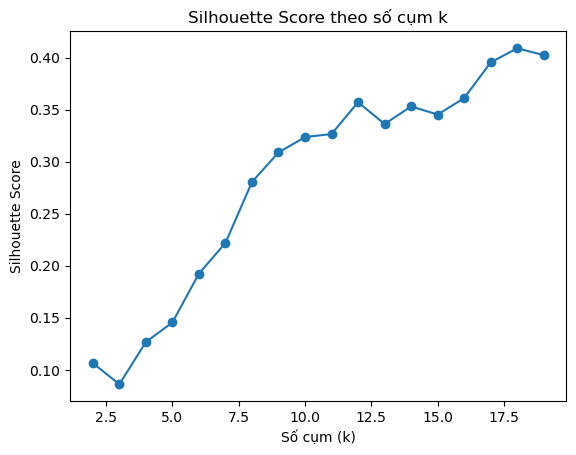

In [3217]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm k')
plt.show()

C:\Users\tchoang\AppData\Local\Temp\ipykernel_16140\3971106088.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


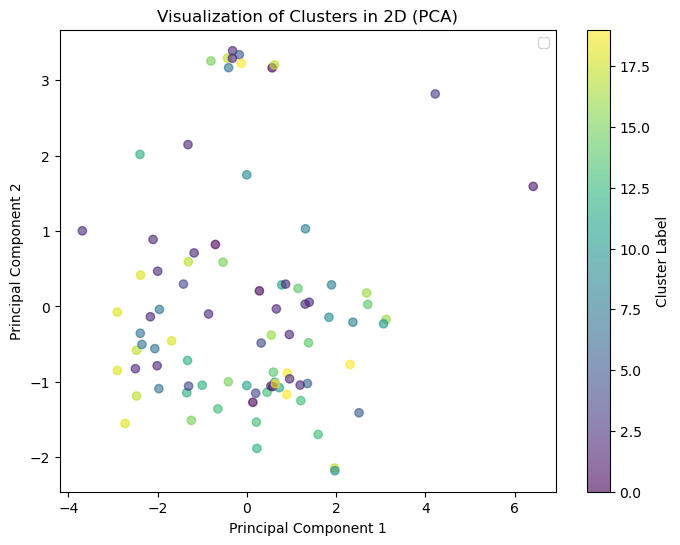

In [3218]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Try to handle type_of_view with 3 different techniques: TF-IDF, BoW, Word Embedding and test with K-means to see which method is the best

## BoW

In [3219]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,...,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.000000,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
85,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3220]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
type_of_view_cv = v.fit_transform(data['type_of_view'].values)
type_of_view_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 675 stored elements and shape (87, 361)>

In [3221]:
type_of_view_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3222]:
type_of_view_cv_np = type_of_view_cv.toarray()
type_of_view_cv_np[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3223]:
data['type_of_view'][:4]

0                                          beach, lake
1    beauty of the coast of Hong Kong, Sai Wan beac...
2                                       forests, views
3                                   views, wildflowers
Name: type_of_view, dtype: object

In [3224]:
type_of_view_cv.shape

(87, 361)

In [3225]:
v.get_feature_names_out()

array(['360', 'aberdeen', 'acacia', 'admire', 'aguilar', 'ancient', 'and',
       'area', 'areas', 'as', 'attractions', 'awe', 'azalea', 'azure',
       'backdrop', 'backs', 'basalt', 'bay', 'bays', 'beach', 'beaches',
       'beacon', 'beauty', 'bell', 'beneath', 'big', 'biodiversity',
       'birds', 'blockhouse', 'blooming', 'box', 'bridge', 'bridges',
       'brisbane', 'buddha', 'by', 'cairn', 'camp', 'can', 'caves',
       'cereus', 'chau', 'chek', 'cherry', 'cheung', 'china', 'chinese',
       'chirping', 'chung', 'city', 'cityscape', 'clear', 'clearwater',
       'coast', 'coastal', 'coastline', 'cochin', 'colours', 'columns',
       'coming', 'country', 'countryside', 'cove', 'craggy', 'creating',
       'crystal', 'cultivation', 'cultural', 'dam', 'davis', 'deck',
       'decomposing', 'defence', 'degree', 'deserted', 'dichrocephala',
       'direction', 'diverse', 'east', 'eight', 'enveloped', 'eroded',
       'escape', 'estuary', 'fathoms', 'fei', 'fields', 'fish', 'flora',

In [3226]:
v.vocabulary_

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [3227]:
from scipy.sparse import csr_matrix
data_normalized_sparse = csr_matrix(data_normalized)

In [3228]:
from scipy.sparse import hstack
data_bow = hstack([type_of_view_cv, data_normalized_sparse])

In [3229]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(data_bow)
labels = kmeans.labels_


In [3230]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_bow, labels)
silhouette_avg

np.float64(0.10465405897532187)

In [3231]:
k_values = range(2, 20)  # Thử k từ 2 đến 9
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_bow)
    score = silhouette_score(data_bow, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[np.float64(0.10465405897532187),
 np.float64(0.07162650150702886),
 np.float64(0.07115846781388657),
 np.float64(0.07561503609559694),
 np.float64(0.08842521982249563),
 np.float64(0.1126998435935446),
 np.float64(0.12933088243869606),
 np.float64(0.13671358914817466),
 np.float64(0.12681156137098773),
 np.float64(0.14276902024175928),
 np.float64(0.17531524212030797),
 np.float64(0.17524536331294036),
 np.float64(0.18620748808354526),
 np.float64(0.20748302291405937),
 np.float64(0.21652130193542504),
 np.float64(0.22681544449292101),
 np.float64(0.21472333141994152),
 np.float64(0.2141369962171162)]

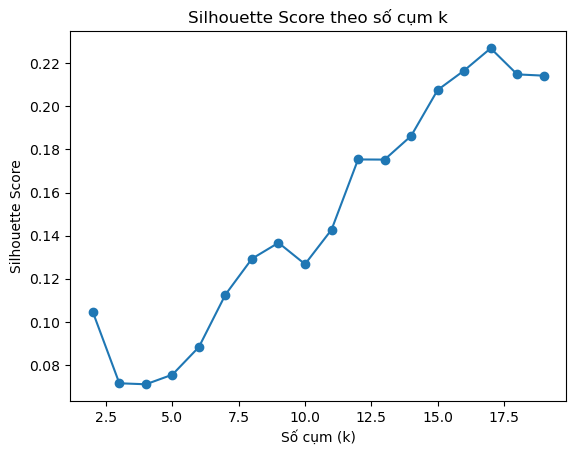

In [3232]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm k')
plt.show()

C:\Users\tchoang\AppData\Local\Temp\ipykernel_16140\1937008597.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


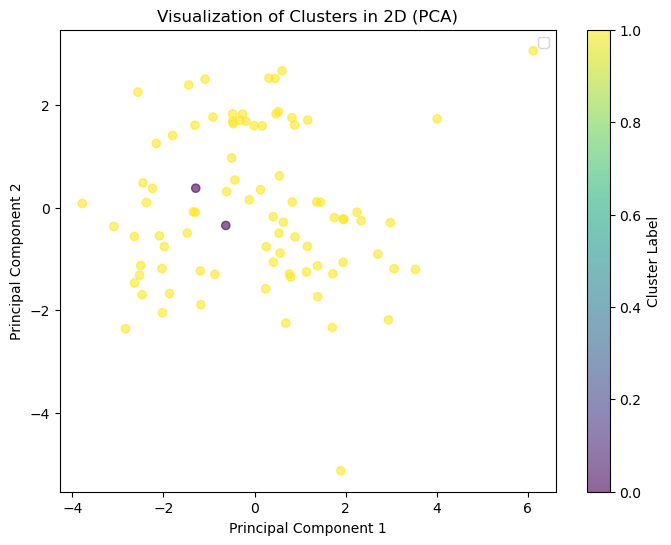

In [3233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_bow)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

## TF-IDF

In [3234]:
from sklearn.feature_extraction.text import TfidfVectorizer
data['type_of_view']

0                                           beach, lake
1     beauty of the coast of Hong Kong, Sai Wan beac...
2                                        forests, views
3                                    views, wildflowers
4                                     forests and views
                            ...                        
82            Pyramid Hill, Ma On Shan, The Hunch Backs
83                Sweet Gum Woods, Thousand-Island Lake
84                                    Tai Tam Reservoir
85                        Views and tourist attractions
86    mountain peaks, traditional villages, coastal ...
Name: type_of_view, Length: 87, dtype: object

In [3235]:
tf = TfidfVectorizer()
type_of_view_tf = tf.fit_transform(data['type_of_view'])

In [3236]:
type_of_view_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 675 stored elements and shape (87, 361)>

In [3237]:
tf.vocabulary_

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [3238]:
all_features_name = tf.get_feature_names_out()
for word in all_features_name:
    indx = v.vocabulary_.get(word)
    print(f"{word} {tf.idf_[indx]}") # Print the idf score (Weighting) of all words

360 4.7841896339182615
aberdeen 4.7841896339182615
acacia 4.7841896339182615
admire 4.7841896339182615
aguilar 4.7841896339182615
ancient 4.378724525810097
and 2.386294361119891
area 4.7841896339182615
areas 4.7841896339182615
as 4.7841896339182615
attractions 4.7841896339182615
awe 4.7841896339182615
azalea 4.7841896339182615
azure 4.378724525810097
backdrop 4.7841896339182615
backs 4.7841896339182615
basalt 4.7841896339182615
bay 3.6855773452501515
bays 4.7841896339182615
beach 3.531426665422893
beaches 3.2801122371419873
beacon 4.7841896339182615
beauty 4.378724525810097
bell 4.7841896339182615
beneath 4.7841896339182615
big 4.7841896339182615
biodiversity 4.7841896339182615
birds 4.7841896339182615
blockhouse 4.7841896339182615
blooming 4.378724525810097
box 4.7841896339182615
bridge 3.8678989020441064
bridges 4.7841896339182615
brisbane 4.7841896339182615
buddha 4.7841896339182615
by 4.7841896339182615
cairn 4.7841896339182615
camp 4.7841896339182615
can 4.7841896339182615
caves 4

In [3239]:
type_of_view_tf.toarray()[:1] # tf-idf score of 'beach' is 0.653

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65343476,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [3240]:
from scipy.sparse import hstack
data_tf = hstack([type_of_view_tf, data_normalized_sparse])

In [3241]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42).fit(data_tf)
labels = kmeans.labels_


In [3242]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_tf, labels)
silhouette_avg

np.float64(0.29302623126545974)

In [3243]:
k_values = range(2, 40)  # Thử k từ 2 đến 9
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_tf)
    score = silhouette_score(data_tf, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[np.float64(0.09968484501742944),
 np.float64(0.07838924911256089),
 np.float64(0.11384775336100657),
 np.float64(0.13356147112488345),
 np.float64(0.1764308068621519),
 np.float64(0.21003889044618673),
 np.float64(0.2518503038901257),
 np.float64(0.2795462168638649),
 np.float64(0.29302623126545974),
 np.float64(0.27788552763315943),
 np.float64(0.28845366768160263),
 np.float64(0.31054788522386906),
 np.float64(0.31847719954528725),
 np.float64(0.34070366231420357),
 np.float64(0.34722498515017947),
 np.float64(0.3431391470293841),
 np.float64(0.3393602089204704),
 np.float64(0.3530051627250632),
 np.float64(0.3194807779359189),
 np.float64(0.3654073005452877),
 np.float64(0.37606541482972233),
 np.float64(0.3876528508272218),
 np.float64(0.3808447283917478),
 np.float64(0.38314148753615457),
 np.float64(0.38740668644621173),
 np.float64(0.3803238341925859),
 np.float64(0.37399236338226),
 np.float64(0.3716263040355875),
 np.float64(0.3631506725356165),
 np.float64(0.3667086733122786

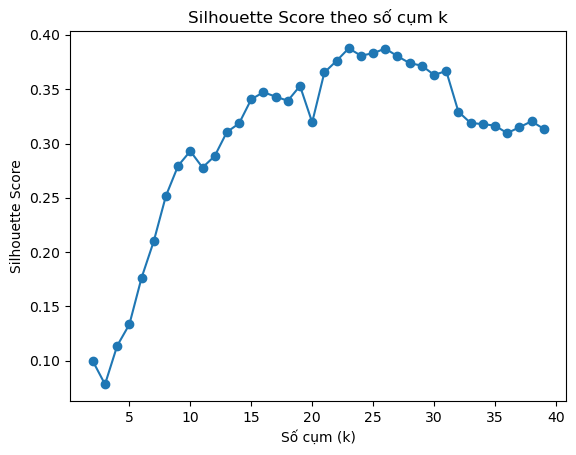

In [3244]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score theo số cụm k')
plt.show()

C:\Users\tchoang\AppData\Local\Temp\ipykernel_16140\2270114863.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


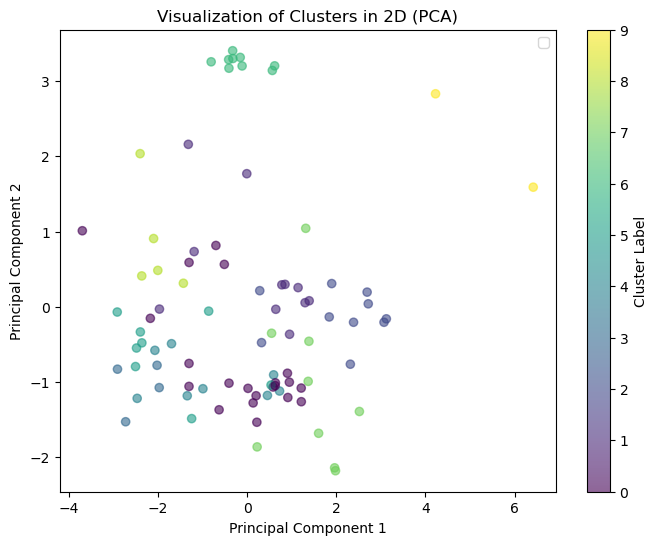

In [3245]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_tf)

# Vẽ scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
# Thêm centroid (tùy chọn)
#centroids = kmeans.cluster_centers_
#centroids_pca = pca.transform(scaler.transform(centroids))
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')

# Thêm tiêu đề và nhãn
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

### TF-IDF is better with Silhouette Score

In [3246]:
data_tfidf = pd.DataFrame(data_tf)
data_tfidf.to_csv('data_tfidf.csv', index=False, encoding='utf-8', sep=',')

In [3247]:

'''
label/one-hot?/binary for categorical features
Test TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.
Process type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.
Use best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain
Visualize best clusters with scatter plot (PCA) and word cloud.
Document: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'''

'\nlabel/one-hot?/binary for categorical features\nTest TF-IDF, BoW, and Word embeddings for type_of_view, evaluate with K-means using Silhouette Score, select TF-IDF if best.\nProcess type, region (one-hot encoding), difficulty (Label Encoding), normalize with StandardScaler.\nUse best type to test K-means, DBSCAN, GMM, Hierarchical Clustering; compare Silhouette Scores + interpretability <=> comparable table? -> explain\nVisualize best clusters with scatter plot (PCA) and word cloud.\nDocument: Describe experiments, comparison table, explain cluster meanings (trail recommendations).'